# Oasis Infobyte Task 4


Priya Dharshini G J


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [22]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [23]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
df.shape

(5572, 5)

In [25]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [26]:
#drop unwanted columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [27]:
df.shape

(5572, 2)

In [28]:
new_name = {'v1':'Category', 'v2':'Messages'}

df = df.rename(columns = new_name)

In [29]:
df.head()

,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df[df.duplicated()]

,Category,Messages
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [31]:
df = df.drop_duplicates()

In [32]:
df.shape

(5169, 2)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   Messages  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


<AxesSubplot:xlabel='Category', ylabel='count'>

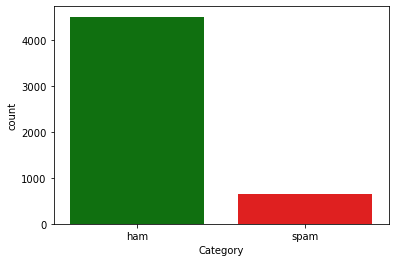

In [34]:
colors = {'ham': 'green', 'spam':'red'}
sns.countplot(data = df, x='Category',palette = colors)

In [35]:
df['Category'].shape

(5169,)

In [36]:
df['Messages'].shape

(5169,)

In [37]:
X = df['Messages']
y = df['Category']

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words = "english",lowercase=True)
X_tfidf = vectorizer.fit_transform(X)

In [39]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto')

# Fit and apply SMOTE to numerical features
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame({'Messages': X_resampled, 'Category': y_resampled})


In [40]:
df_resampled.shape

(9032, 2)

<AxesSubplot:xlabel='Category', ylabel='count'>

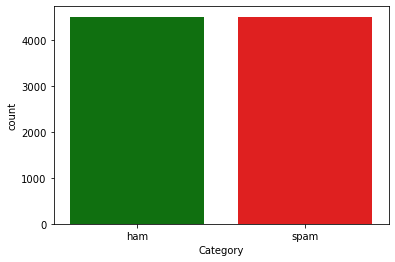

In [41]:
colors = {'ham': 'green', 'spam':'red'}
sns.countplot(data = df_resampled, x='Category',palette = colors)

In [42]:
df_resampled.head()

,Messages,Category
0,"(0, 8026)\t0.19575229718355341\n (0, 1051)\...",ham
1,"(0, 5369)\t0.5464988818914979\n (0, 8134)\t...",ham
2,"(0, 77)\t0.23979791195963693\n (0, 1128)\t0...",spam
3,"(0, 3815)\t0.538144844323317\n (0, 2757)\t0...",ham
4,"(0, 4535)\t0.5048765886554205\n (0, 7837)\t...",ham


In [43]:
from sklearn.preprocessing import LabelEncoder as le
y_resampled = le().fit_transform(y_resampled)

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.3 )

In [45]:
y_train

array([0, 0, 0, ..., 0, 1, 1])

In [46]:
#X_train_features = vectorizer.fit_transform(X_train)
#X_test_features = vectorizer.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on training data: ", accuracy)

Accuracy on training data:  0.9928819993672888


In [49]:
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test,y_pred_test)
print("Accuracy on test data: ", accuracy_test)

Accuracy on test data:  0.9896678966789668


In [50]:
mail = ["Hi friend, How are you?"]
input_data_features = vectorizer.transform(mail)
prediction = model.predict(input_data_features)

if prediction == 0:
    print('ham mail')
else:
    print('spam mail')

ham mail


In [51]:
mail = ["hello riya, you've received a bumper price in our contest, just click the link to claim the prize money"]
input_data_features = vectorizer.transform(mail)
prediction = model.predict(input_data_features)

if prediction == 0:
    print('ham mail')
else:
    print('spam mail')

spam mail


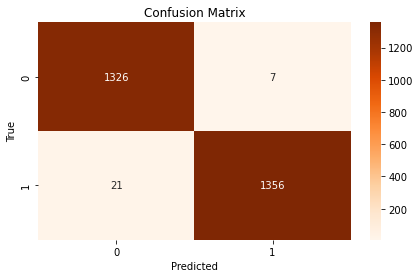

In [52]:
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d',cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Accuracy of the model is 98%

# 1326 emails are correctly classified as ham

# 7 email are incorrectly classified as spam where they are actually ham

# 21 emails are incorrectly classified as ham where they are actually spam

# 1356 emails are correctly classifed as spam
